In [36]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [37]:
data = load_iris()
X, y = data['data'], data['target']
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [38]:
for i, x in enumerate(X[:10]):
    print(x, y[i])

[5.1 3.5 1.4 0.2] 0
[4.9 3.  1.4 0.2] 0
[4.7 3.2 1.3 0.2] 0
[4.6 3.1 1.5 0.2] 0
[5.  3.6 1.4 0.2] 0
[5.4 3.9 1.7 0.4] 0
[4.6 3.4 1.4 0.3] 0
[5.  3.4 1.5 0.2] 0
[4.4 2.9 1.4 0.2] 0
[4.9 3.1 1.5 0.1] 0


In [39]:
def distance(p1 : np.ndarray,p2: np.ndarray) -> np.float64:
    return np.sqrt(np.sum((p1-p2)**2))

def getCentroid(cluster : np.ndarray) -> np.ndarray:
    return np.mean(cluster, axis=0)

In [40]:
def kmeans(k : int, data : np.ndarray):
    rng = np.random.default_rng()
    centroids = rng.choice(data, k, replace=False)
    while(True):
        clusters = [[] for _ in range(k)]
        
        for point in data:
            distanceToCentroids = [distance(point, centroid) for centroid in centroids]
            cluster_index = np.argmin(distanceToCentroids)
            clusters[cluster_index].append(point)
            
        new_centroids = np.array([getCentroid(np.array(cluster)) for cluster in clusters])
        if(np.allclose(new_centroids, centroids)): return clusters
        centroids = new_centroids
    

In [41]:
from sklearn.cluster import KMeans

In [46]:
myKMeans = kmeans(4, X)
skKmeans = KMeans(3).fit(X)

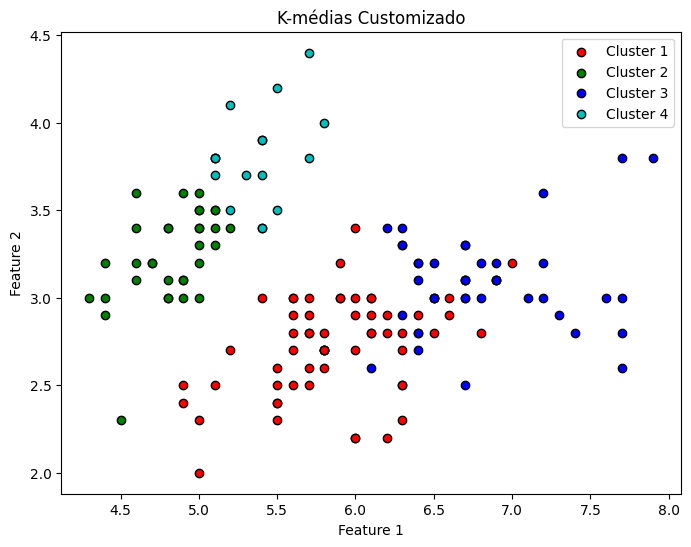

In [48]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
plt.figure(figsize=(8, 6))
for i, cluster in enumerate(myKMeans):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i], label=f'Cluster {i+1}', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-médias Customizado')
plt.legend()
plt.show()

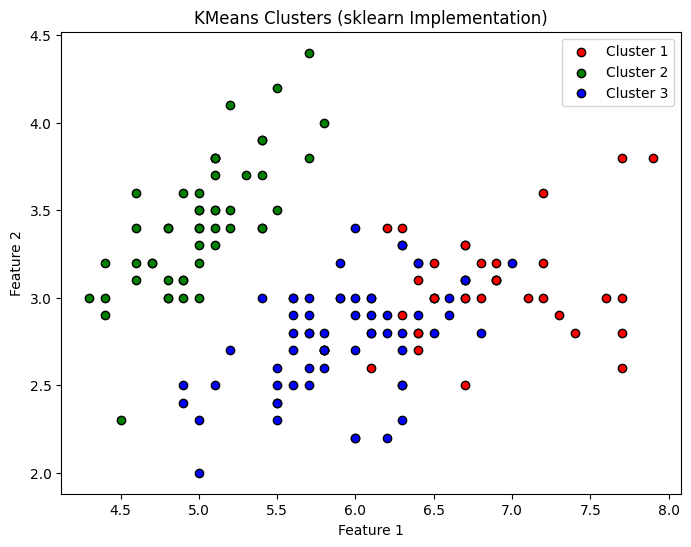

In [9]:
plt.figure(figsize=(8, 6))
for i in range(3):
    cluster_points = X[skKmeans.labels_ == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i], label=f'Cluster {i+1}', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clusters (sklearn Implementation)')
plt.legend()
plt.show()

In [10]:
from scipy.optimize import linear_sum_assignment
import numpy as np

def clustering_accuracy(true_labels, predicted_labels):

    # Build confusion matrix
    D = max(true_labels.max(), predicted_labels.max()) + 1
    confusion_matrix = np.zeros((D, D), dtype=np.int64)
    for t, p in zip(true_labels, predicted_labels):
        confusion_matrix[t, p] += 1

    # Find optimal assignment
    row_ind, col_ind = linear_sum_assignment(-confusion_matrix)
    accuracy = confusion_matrix[row_ind, col_ind].sum() / len(true_labels)
    return accuracy

In [23]:
myResults = []
skResults = []

for k in range(2, 7):
    acc = 0
    skAcc = 0
    for _ in range(100):
        myKMeans = kmeans(k, X)
        myLabels = np.array([i for i, cluster in enumerate(myKMeans) for _ in cluster])
        skKmeans = KMeans(k).fit(X)
        skLabels = skKmeans.labels_
        
        acc += clustering_accuracy(y, myLabels)
        skAcc += clustering_accuracy(y, skLabels)
        
    myResults.append(acc/100)
    skResults.append(skAcc/100)

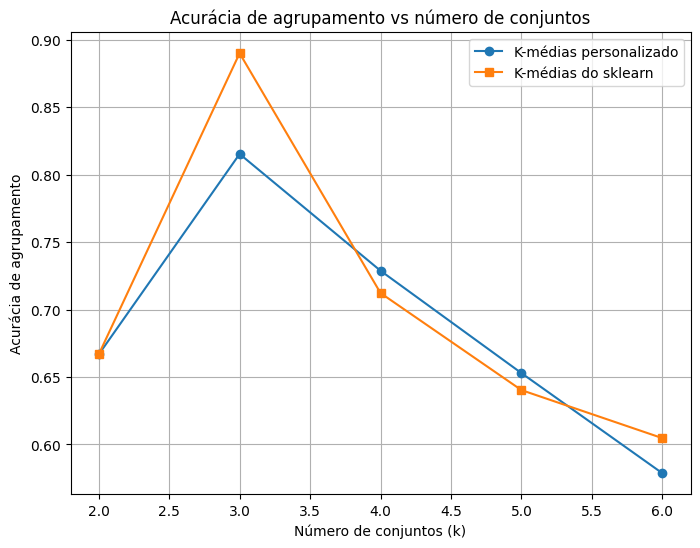

In [26]:
plt.figure(figsize=(8, 6))
plt.plot(range(2, 7), myResults, marker='o', label='K-médias personalizado')
plt.plot(range(2, 7), skResults, marker='s', label='K-médias do sklearn')
plt.xlabel('Número de conjuntos (k)')
plt.ylabel('Acurácia de agrupamento')
plt.title('Acurácia de agrupamento vs número de conjuntos')
plt.legend()
plt.grid(True)
plt.show()